<a href="https://colab.research.google.com/github/nasif-raihan/Image-Processing/blob/main/DIP_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive

In [ ]:
drive.mount('/content/datasets/')

Drive already mounted at /content/datasets/; to attempt to forcibly remount, call drive.mount("/content/datasets/", force_remount=True).


(779, 640, 3)

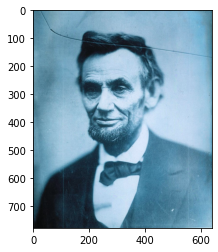

In [ ]:
path = '/content/datasets/MyDrive/MasterOpenCV/images/abraham.jpg'

img = cv.imread(path)

plt.imshow(img)

img.shape

In [ ]:
def entropy(im):
    #here we calculate the probability value by normalized histogram
    p = np.array([(im==v).sum() for v in range(256)])
    p = p/p.sum()
    # Compute e = -sum(p(g)*log2(p(g)))
    e = -(p[p>0]*np.log2(p[p>0])).sum()
    
    return e

In [ ]:
en = entropy(img)
print("Entropy(main image):")
print(en)

Entropy(main image):
7.815282077905712


In [ ]:
print(img.shape)
row, col, band = img.shape
img2 = np.zeros([row, col])
img2.shape

(779, 640, 3)


(779, 640)

In [ ]:
img = img[:, :, 0]
img.shape

(779, 640)

In [ ]:
height = 779
width = 640
size = 1024*8*97
bitrate = size/(height*width)
print("Bitrate/pixel(main image): ")
print(bitrate)

Bitrate/pixel(main image): 
1.5938382541720153


In [ ]:
table = [{'Rule' : 'Result'}]

In [ ]:
for i in range(1, row):
  for j in range(1, col):
      img2[i][j] = img[i-1][j]

en1 = entropy(img2)

table.append({'B' : en1})

In [ ]:
for i in range(1, row):
  for j in range(1, col):
      img2[i][j] = img[i-1][j-1]

en1 = entropy(img2)

table.append({'C' : en1})

In [ ]:
for i in range(1, row):
  for j in range(1, col):
    img2[i][j] = img[i][j-1]

en1 = entropy(img2)

table.append({'A' : en1})

In [ ]:
for i in range(1, row):
  for j in range(1, col):
      img2[i][j] = img[i][j] - (img[i][j-1]+img[i-1][j])/2

en1 = entropy(img2)

table.append({'(A+B)/2' : en1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  This is separate from the ipykernel package so we can avoid doing imports until




Entropy of Residual image: 


[{'Rule': 'Result'},
 {'B': 7.631160951019389},
 {'C': 7.63107517675062},
 {'A': 7.631207263195706},
 {'(A+B)/2': 4.555344992000064}]

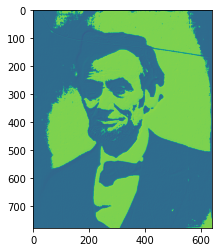

In [ ]:
plt.imshow(img2)
print("\n")
print("Entropy of Residual image: ")
table